# Import all the packages we need

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
tf.autograph.set_verbosity(0)

from autils import *

np.set_printoptions(precision=2)

# Load the data

In [8]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")
print(X[0])
print(y[0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01  2.78e-02 -7.06e-03
  2.35

# Plot the image with corresponding label

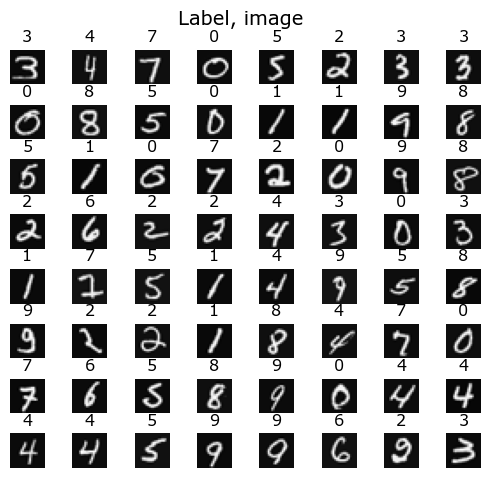

In [3]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)



# Create the Model and fit the data

In [4]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu', name="L1"),
        Dense(15, activation='relu', name="L2"),
        Dense(10, activation='linear', name="L3")
        
    ], name = "my_model" 
)
print(model.summary())

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=100
)

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 1.4629
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5716
Epoch 3/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4105
Epoch 4/100
157/157 [==============

# Try predicting an image of two

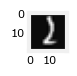

1/1 [==============================] - 0s 64ms/step
 predicting a Two: 
[[-16.18   4.31  10.19   2.19 -16.23  -7.92 -13.98   3.53 -13.03 -11.92]]
 Largest Prediction index: 2
 predicting a Two. Probability vector: 
[[3.50e-12 2.77e-03 9.96e-01 3.33e-04 3.33e-12 1.36e-08 3.16e-11 1.27e-03
  8.16e-11 2.47e-10]]
Total of predictions: 1.000
np.argmax(prediction_p): 2


In [5]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

# Plot the prediction label and True label, and calculate the model error

1/1 [==============================] - 0s 20ms/step


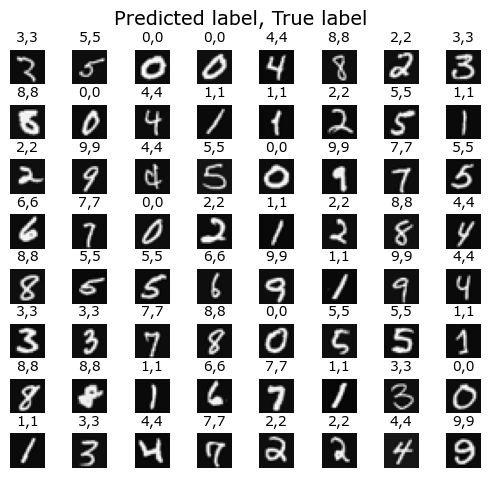

157/157 [==============================] - 0s 923us/step
no errors found
0 errors out of 5000 images


In [6]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Predicted label, True label", fontsize=14)
plt.show()


print( f"{display_errors(model,X,y)} errors out of {len(X)} images")
